In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import classification_report
from pathlib import Path

DATA_DIR = Path('../data')
rng = np.random.default_rng()

In [2]:
data = sio.loadmat(DATA_DIR / 'ex3data1.mat')
X = data['X']
for i, v in enumerate(X):
    X[i] = v.reshape((20,  20), order='F').reshape(-1)
y = data['y']
y[y==10] = 0
X.shape, y.shape

((5000, 400), (5000, 1))

this should be [2]


(-0.5, 19.5, 19.5, -0.5)

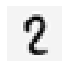

In [3]:
pick_idx = rng.integers(0, 5000)
pick_x = X[pick_idx]
print(f'this should be {y[pick_idx]}')
# plot_an_image(pick_x)
fig, ax = plt.subplots(figsize=(1, 1))
ax.matshow(pick_x.reshape((20, 20)), cmap=cm.binary)
# ax.xticks([])
# ax.yticks([])
ax.axis('off')

In [4]:
def show_data(X):
    # figsize=(100, 100)
    pick_idxes = rng.choice(np.arange(X.shape[0]), 100)
    pick_X = X[pick_idxes]
    data = np.ones((209, 209)) # pad = 1
    row = 0
    for i in range(10):
        _row = row + 20
        col = 0
        for j in range(10):
            _col = col + 20
            data[row:_row, col:_col] = pick_X[i*10+j].reshape((20, 20))
            col = _col + 1
        row = _row + 1
    fig, ax = plt.subplots(figsize=(11, 11))
    ax.matshow(data, cmap=cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))
    return pick_idxes, fig

[[6 4 5 9 7 8 8 2 6 4]
 [6 3 5 5 8 3 2 1 5 8]
 [7 5 5 9 7 1 7 3 5 7]
 [6 4 1 5 5 6 0 2 7 6]
 [4 3 7 4 3 2 2 4 5 5]
 [6 6 9 8 4 2 3 3 0 7]
 [1 7 9 9 6 2 8 2 0 4]
 [6 4 4 4 9 1 6 4 3 5]
 [1 5 4 3 7 2 3 8 5 9]
 [2 7 3 4 2 0 4 6 6 7]]


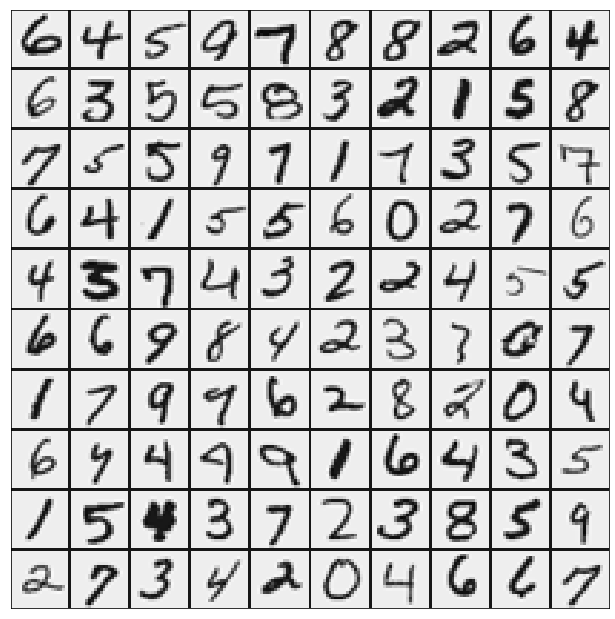

In [5]:
pick_idxes, fig = show_data(X)
fig.show()
print(y[pick_idxes].reshape((10, 10)))

In [6]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [7]:
def reg_cost_fn(theta, X, y, reg_param=1):
    theta = np.expand_dims(theta, axis=1)
    y = np.expand_dims(y, axis=1)
    m = len(X)
    h = sigmoid(X @ theta)
    t = theta[1:]
    reg = reg_param / (2*m) * (t.T @ t)
    return (((-y.T @ np.log(h) + (y - 1).T @ np.log(1 - h)) / len(X)) + reg).item()

In [8]:
def reg_gradient_fn(theta, X, y, reg_param=1):
    theta = np.expand_dims(theta, axis=1)
    y = np.expand_dims(y, axis=1)
    m = len(X)
    reg = reg_param * np.concatenate((np.zeros((1,1)), theta[1:]))
    return (X.T @ (sigmoid(X @ theta) - y) +reg).reshape(-1) / m

In [9]:
def logistic_regression(X, y, reg_param=1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(
        fun=reg_cost_fn,
        x0=theta,
        # fprime若为 None，func 应返回 cost 和 gradient
        jac=reg_gradient_fn,
        # 将会传递给 func (and fprime)
        args=(X, y, reg_param),
        method='TNC',
        options={'disp': True},
    )
    print(res.success)
    return res.x

In [10]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [11]:
data = sio.loadmat(DATA_DIR / 'ex3data1.mat')
X = data['X']
for i, v in enumerate(X):
    X[i] = v.reshape((20,  20), order='F').reshape(-1)
X = np.pad(X, ((0, 0), (1, 0)), constant_values=1)

y = data['y'].reshape(-1)

y[y==10] = 0
X.shape, y.shape

((5000, 401), (5000,))

In [12]:
all_theta = np.empty((10, 401))

for i in range(10):
    _y = (y == i).astype(int)
    all_theta[i] = logistic_regression(X, _y)

all_theta

True
True
True
True
True
True
True
True
True
True


array([[-5.40479289e+00,  0.00000000e+00, -1.72153517e-09, ...,
        -2.29843412e-04,  4.91391026e-04,  0.00000000e+00],
       [-2.38335176e+00,  0.00000000e+00, -3.25782041e-11, ...,
         2.36122488e-04,  1.63958056e-05,  0.00000000e+00],
       [-3.18372995e+00,  0.00000000e+00, -1.60471433e-06, ...,
         2.12716567e-03, -1.48164594e-04,  0.00000000e+00],
       ...,
       [-1.90514843e+00,  0.00000000e+00, -7.79632357e-11, ...,
        -2.76964297e-02,  1.23751240e-03,  0.00000000e+00],
       [-7.98763212e+00,  0.00000000e+00, -6.98651635e-10, ...,
         8.79156607e-03, -6.39684136e-04,  0.00000000e+00],
       [-4.57370170e+00,  0.00000000e+00, -1.86109454e-08, ...,
        -9.81556690e-04, -1.22609057e-03,  0.00000000e+00]])

In [13]:
y_pred = predict(X, all_theta[0])
print(f'Accuracy={np.mean((y==0) == y_pred)}')
# y_pred

Accuracy=0.9974


In [14]:
prob_matrix = sigmoid(X @ all_theta.T)
y_pred = np.argmax(prob_matrix, axis=1)

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



# 神经网络
1. L1: 400
2. L2: 25
3. L3: 10

In [16]:
weights = sio.loadmat(DATA_DIR / 'ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [17]:
# 未修改的原始数据，匹配所给权重
data = sio.loadmat(DATA_DIR / 'ex3data1.mat')
X = data['X']
# for i, v in enumerate(X):
#     X[i] = v.reshape((20,  20), order='F').reshape(-1)
X = np.pad(X, ((0, 0), (1, 0)), constant_values=1)

y = data['y'].reshape(-1)

# y[y==10] = 0
X.shape, y.shape

((5000, 401), (5000,))

In [18]:
a1 = X
a1.shape, a1

((5000, 401),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]))

In [19]:
z2 = a1 @ theta1.T
z2.shape, z2

((5000, 25),
 array([[ -2.93684669,  -2.45058587,   4.95510333, ...,   3.56635593,
           2.81388641,  -2.1195223 ],
        [ -4.81302157,  -2.92257775,   2.6445065 , ...,   2.10497303,
           4.69948787,  -2.76096862],
        [ -4.24056958,  -3.68698052,   5.99656398, ...,   1.54599347,
           3.08971226,  -2.32990819],
        ...,
        [ -0.86267303,   1.00939507,  -1.67526051, ...,   1.8185898 ,
          -3.18203449,  -1.72539781],
        [  1.74408423,  -0.58216518,  -1.49164167, ...,   4.17481481,
          -0.96739536,  -3.08906563],
        [  3.55683614, -12.11330792,   5.01096205, ...,   7.17585008,
           2.15484114,  -2.9424052 ]]))

In [20]:
a2 = np.pad(sigmoid(z2), ((0, 0), (1, 0)), constant_values=1)

a2.shape, a2

((5000, 26),
 array([[1.00000000e+00, 5.03618685e-02, 7.93957162e-02, ...,
         9.72517962e-01, 9.43421623e-01, 1.07213787e-01],
        [1.00000000e+00, 8.05782163e-03, 5.10486829e-02, ...,
         8.91385592e-01, 9.90982126e-01, 5.94701645e-02],
        [1.00000000e+00, 1.41949887e-02, 2.44354705e-02, ...,
         8.24334311e-01, 9.56466386e-01, 8.86760824e-02],
        ...,
        [1.00000000e+00, 2.96781175e-01, 7.32901746e-01, ...,
         8.60396828e-01, 3.98474223e-02, 1.51177198e-01],
        [1.00000000e+00, 8.51205095e-01, 3.58434539e-01, ...,
         9.84854863e-01, 2.75399966e-01, 4.35605471e-02],
        [1.00000000e+00, 9.72262381e-01, 5.48598771e-06, ...,
         9.99235749e-01, 8.96120297e-01, 5.00966928e-02]]))

In [21]:
z3 = a2 @ theta2.T
z3.shape, z3

((5000, 10),
 array([[ -9.09100987,  -6.35139284,  -5.97820432, ...,  -7.81998092,
          -5.03242138,   5.45280636],
        [ -7.64327488,  -6.02365485,  -5.66663594, ...,  -6.03362019,
          -6.22762221,   5.44411453],
        [ -9.33162618,  -5.72811111,  -3.64155808, ...,  -2.71165297,
          -5.19785122,   2.55649129],
        ...,
        [ -2.90790484,  -5.5644267 ,  -3.48889874, ...,  -6.13702924,
           0.61827864, -10.62754533],
        [ -7.09249356,  -7.3819422 ,  -8.06415305, ...,  -4.41613593,
           3.52570957,  -8.4865856 ],
        [ -9.94121247,  -7.68638967, -10.74675633, ...,  -5.15553077,
           0.82968816,  -2.41737004]]))

In [22]:
a3 = sigmoid(z3)
a3.shape, a3

((5000, 10),
 array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
         4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
        [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
         2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
        [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
         6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
        ...,
        [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
         2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
        [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
         1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
        [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
         5.73434571e-03, 6.96288990e-01, 8.18576980e-02]]))

In [23]:
y_pred = np.argmax(a3, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention，返回沿轴axis最大值的索引，axis=1代表行
y_pred.shape

(5000,)

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

